In [1]:
import matplotlib.pyplot as plt
import numpy as np

from ffi_demo_ctypes.core import *


In [2]:
# Setup a typical model run
domain = new_domain('HIGH')
source = new_source()
methour = new_methour()

# Simulate 250 hours of operation
methour.hours = 250

# Generate zeroed numpy arrays and run dispersion simulation
r_grid, h_grid = new_grids(domain)
iter_disp(r_grid, h_grid, domain, source, methour)

# Generate banded images
png_r_grid, png_h_grid = new_images(domain)
create_image(png_r_grid, r_grid, domain, 'PLAN')
create_image(png_h_grid, h_grid, domain, 'SECTION')


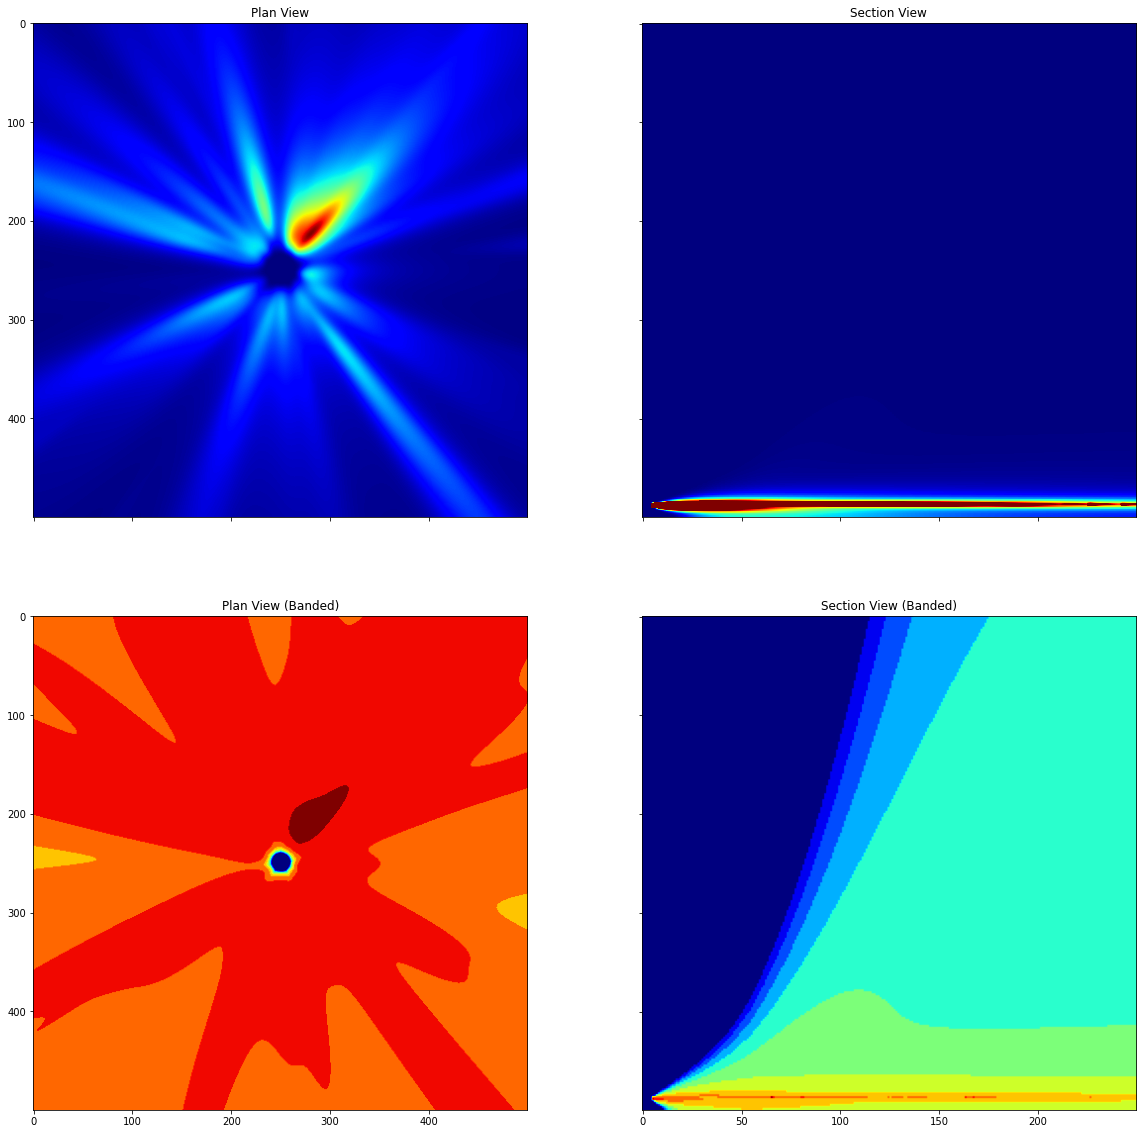

In [3]:
# Plot figures
fig, axs = plt.subplots(2, 2)

fig.set_figheight(20)
fig.set_figwidth(20)

axs[0,0].set_title('Plan View')
axs[0,0].imshow(np.sin(r_grid).reshape((domain.xr_points, domain.yr_points)), cmap='jet')
axs[0,1].set_title('Section View')
axs[0,1].imshow(h_grid.reshape((domain.zh_points, domain.xh_points)), cmap='jet', vmax=np.percentile(h_grid, 99))
axs[1,0].set_title('Plan View (Banded)')
axs[1,0].imshow(png_r_grid.reshape((domain.xr_points, domain.yr_points)), cmap='jet')
axs[1,1].set_title('Section View (Banded)')
axs[1,1].imshow(png_h_grid.reshape((domain.zh_points, domain.xh_points)), cmap='jet')

for ax in fig.get_axes():
    ax.label_outer()
